In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
import scipy as sp
import os
import re

In [ ]:
files = ["2016-Obama.txt", "2015-Obama.txt", "2014-Obama.txt", "2013-Obama.txt"]

# read lines command

paperwords = []
for d in files: 
    with open( str(d), encoding = 'latin1') as nf:
        lines = nf.readlines()
    
    i = 1
    for x in lines: 
        words = x.split()
        for w in words:
            paperwords.append([d, i, w])
                
        i += 1
    
    #file_path = '/Downloads/'+ str(d) 
    #paper_words = pd.DataFrame({'file': [d for d in file_path]})
    #paper_words['text'] = paper_words['file'].apply(lambda x: open(x).read().splitlines())


In [ ]:
paperwords

[['2016-Obama.txt', 1, 'Mr.'],
 ['2016-Obama.txt', 1, 'Speaker,'],
 ['2016-Obama.txt', 1, 'Mr.'],
 ['2016-Obama.txt', 1, 'Vice'],
 ['2016-Obama.txt', 1, 'President,'],
 ['2016-Obama.txt', 1, 'Members'],
 ['2016-Obama.txt', 1, 'of'],
 ['2016-Obama.txt', 1, 'Congress,'],
 ['2016-Obama.txt', 1, 'my'],
 ['2016-Obama.txt', 1, 'fellow'],
 ['2016-Obama.txt', 1, 'Americans:'],
 ['2016-Obama.txt', 2, 'Tonight'],
 ['2016-Obama.txt', 2, 'marks'],
 ['2016-Obama.txt', 2, 'the'],
 ['2016-Obama.txt', 2, 'eighth'],
 ['2016-Obama.txt', 2, 'year'],
 ['2016-Obama.txt', 2, 'I\x92ve'],
 ['2016-Obama.txt', 2, 'come'],
 ['2016-Obama.txt', 2, 'here'],
 ['2016-Obama.txt', 2, 'to'],
 ['2016-Obama.txt', 2, 'report'],
 ['2016-Obama.txt', 2, 'on'],
 ['2016-Obama.txt', 2, 'the'],
 ['2016-Obama.txt', 2, 'State'],
 ['2016-Obama.txt', 2, 'of'],
 ['2016-Obama.txt', 2, 'the'],
 ['2016-Obama.txt', 2, 'Union.'],
 ['2016-Obama.txt', 2, 'And'],
 ['2016-Obama.txt', 2, 'for'],
 ['2016-Obama.txt', 2, 'this'],
 ['2016-Obama.txt

In [ ]:
from nltk.corpus import stopwords

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stop_words = list(stopwords.words('english'))

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
for word in paperwords: # iterate over word_list
  if word[2] in stop_words: 
    paperwords.remove(word) # remove word from paperwords if it is a stopword

In [ ]:
len(paperwords)

17571

In [ ]:
ppwords = pd.DataFrame(paperwords, columns = ['speech', 'line', 'word'])

In [ ]:
ppwords

,speech,line,word
0,2016-Obama.txt,1,Mr.
1,2016-Obama.txt,1,"Speaker,"
2,2016-Obama.txt,1,Mr.
3,2016-Obama.txt,1,Vice
4,2016-Obama.txt,1,"President,"
...,...,...,...
17566,2013-Obama.txt,88,God
17567,2013-Obama.txt,88,bless
17568,2013-Obama.txt,88,United
17569,2013-Obama.txt,88,States


In [ ]:
ppwords.shape

(17571, 3)

In [ ]:
ppwords["word"] = ppwords['word'].str.replace('[^\w\s]','', regex='True')

In [ ]:
ppwords

,speech,line,word
0,2016-Obama.txt,1,Mr
1,2016-Obama.txt,1,Speaker
2,2016-Obama.txt,1,Mr
3,2016-Obama.txt,1,Vice
4,2016-Obama.txt,1,President
...,...,...,...
17566,2013-Obama.txt,88,God
17567,2013-Obama.txt,88,bless
17568,2013-Obama.txt,88,United
17569,2013-Obama.txt,88,States


In [ ]:
# obtaining sentiment list from ntlk module and turning it into a dataframe

In [ ]:
import os
os.chdir('/Users/isabella/Downloads/')
df_bing = pd.read_csv('/Users/isabella/Downloads/bing.csv')

In [ ]:
df_bing.head()

,Unnamed: 0,word,sentiment
0,1,2-faces,negative
1,2,abnormal,negative
2,3,abolish,negative
3,4,abominable,negative
4,5,abominably,negative


In [ ]:
# inner merging on word

In [ ]:
result = ppwords.merge(df_bing, on = 'word')

In [ ]:
result.head(-5)

,speech,line,word,Unnamed: 0,sentiment
0,2016-Obama.txt,3,well,6640,positive
1,2016-Obama.txt,27,well,6640,positive
2,2016-Obama.txt,46,well,6640,positive
3,2016-Obama.txt,46,well,6640,positive
4,2016-Obama.txt,46,well,6640,positive
...,...,...,...,...,...
1637,2013-Obama.txt,78,ripped,5142,negative
1638,2013-Obama.txt,79,senseless,5340,negative
1639,2013-Obama.txt,79,perfectly,4532,positive
1640,2013-Obama.txt,79,perfect,4530,positive


In [ ]:
result['sentiment'] = result['sentiment'].replace('positive', 1)
result['sentiment'] = result['sentiment'].replace('negative', -1)

In [ ]:
result['percentage'] = round(result['line'] / max(result['line']) *100/5)*5
                             

In [ ]:
o2013 = result[result['speech'] == '2013-Obama.txt']
o2014 = result.loc[result['speech'] == '2014-Obama.txt']
o2015 = result.loc[result['speech'] == '2015-Obama.txt']
o2016 = result.loc[result['speech'] == '2016-Obama.txt']

In [ ]:
o2013a = o2013[['percentage', 'speech', 'sentiment']].groupby('percentage')['sentiment'].sum()
o2014a = o2014[['percentage', 'speech', 'sentiment']].groupby('percentage')['sentiment'].sum()
o2015a = o2015[['percentage', 'speech', 'sentiment']].groupby('percentage')['sentiment'].sum()
o2016a = o2016[['percentage', 'speech', 'sentiment']].groupby('percentage')['sentiment'].sum()



In [ ]:
o2013a

percentage
0.0       2
5.0       7
10.0      9
15.0      1
20.0     20
25.0     10
30.0     11
35.0     10
40.0      5
45.0     11
50.0     16
55.0     10
60.0     17
65.0      3
70.0      8
75.0     27
80.0      4
85.0     -1
90.0      2
95.0      4
100.0     2
Name: sentiment, dtype: int64

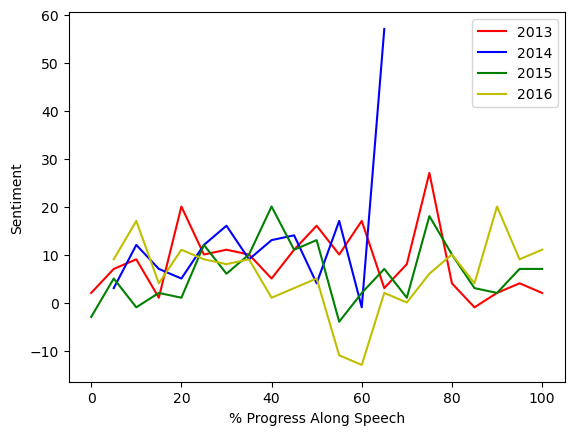

In [ ]:
from numpy import *
import math
import matplotlib.pyplot as plt

plt.plot(o2013a, 'r', label = '2013')
plt.plot(o2014a, 'b', label = '2014') 
plt.plot(o2015a, 'g', label = '2015')
plt.plot(o2016a, 'y', label = '2016')
plt.xlabel('% Progress Along Speech')
plt.ylabel('Sentiment')



plt.legend()
plt.show()

In [ ]:
pw = ppwords[['speech', 'word']] 

In [ ]:
d = pw.groupby(['speech', 'word']).size().reset_index(name='n')

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object and fit it on the documents

vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(d['word'])


In [ ]:
dtm_df = pd.DataFrame(dtm.todense(),
                      index=d['speech'],
                      columns=vectorizer.get_feature_names())


/Users/isabella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
dtm_df

,10,100,10000,1010,102,11,12,13,14,140,...,youd,youll,young,younger,youngest,youngstown,your,youre,youve,zero
speech,,,,,,,,,,,,,,,,,,,,,
2013-Obama.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-Obama.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-Obama.txt,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-Obama.txt,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-Obama.txt,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-Obama.txt,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2016-Obama.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2016-Obama.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
new_df = dtm_df.groupby(dtm_df.index).sum()

In [ ]:
new_df

,10,100,10000,1010,102,11,12,13,14,140,...,youd,youll,young,younger,youngest,youngstown,your,youre,youve,zero
speech,,,,,,,,,,,,,,,,,,,,,
2013-Obama.txt,1,1,0,0,1,0,1,0,0,1,...,0,0,1,0,1,1,1,0,0,0
2014-Obama.txt,0,1,0,1,0,0,0,0,0,0,...,1,0,1,0,1,1,1,0,0,1
2015-Obama.txt,1,0,0,0,0,1,0,1,1,0,...,0,0,1,1,0,0,1,1,1,1
2016-Obama.txt,0,0,1,0,0,0,0,0,1,0,...,0,2,1,0,0,0,1,2,1,0


In [ ]:
new = new_df.transpose()

In [ ]:
new.corr()

speech,2013-Obama.txt,2014-Obama.txt,2015-Obama.txt,2016-Obama.txt
speech,,,,
2013-Obama.txt,1.000000,0.171133,0.130903,0.132400
2014-Obama.txt,0.171133,1.000000,0.146824,0.149480
2015-Obama.txt,0.130903,0.146824,1.000000,0.177236
2016-Obama.txt,0.132400,0.149480,0.177236,1.000000
